# Flood Prediction

### Data 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv')
df

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,1117952,3,3,4,10,4,5,5,7,10,...,7,8,7,2,2,1,4,6,4,0.495
1117953,1117953,2,2,4,3,9,5,8,1,3,...,9,4,4,3,7,4,9,4,5,0.480
1117954,1117954,7,3,9,4,6,5,9,1,3,...,5,5,5,5,6,5,5,2,4,0.485
1117955,1117955,7,3,3,7,5,2,3,4,6,...,6,8,5,3,4,6,7,6,4,0.495


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

### EDA

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

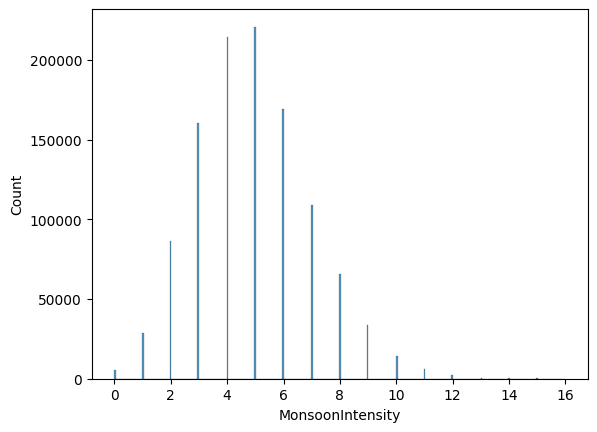

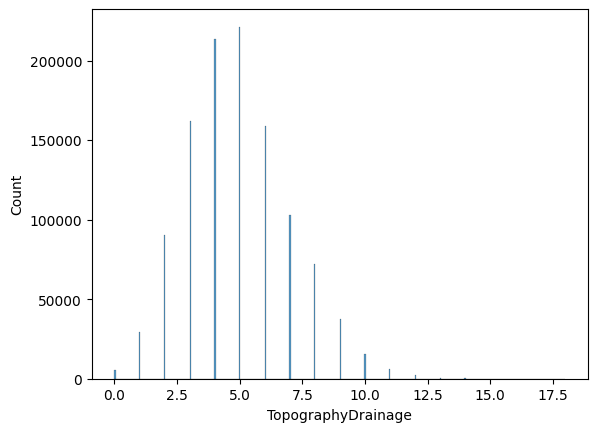

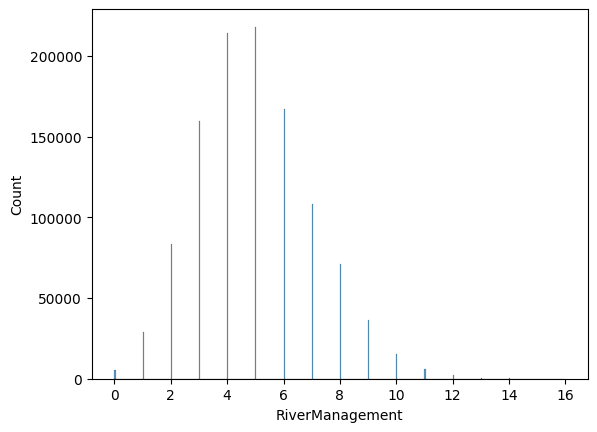

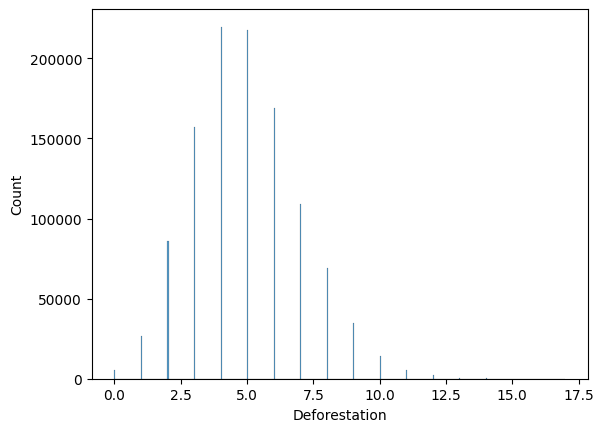

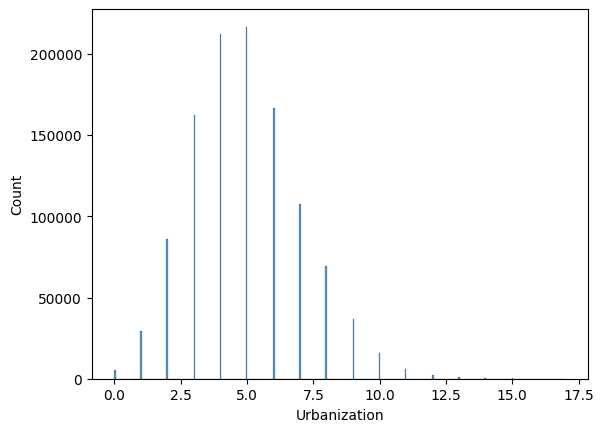

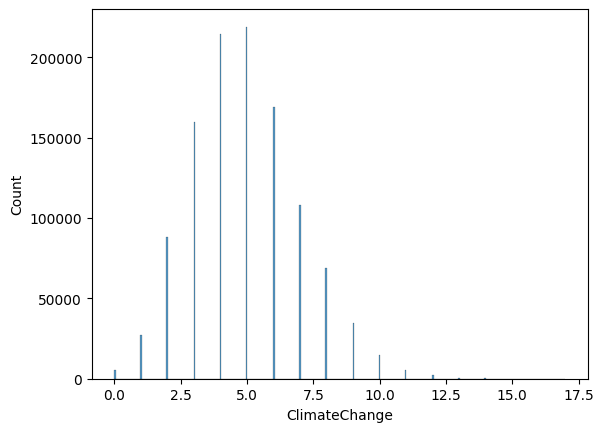

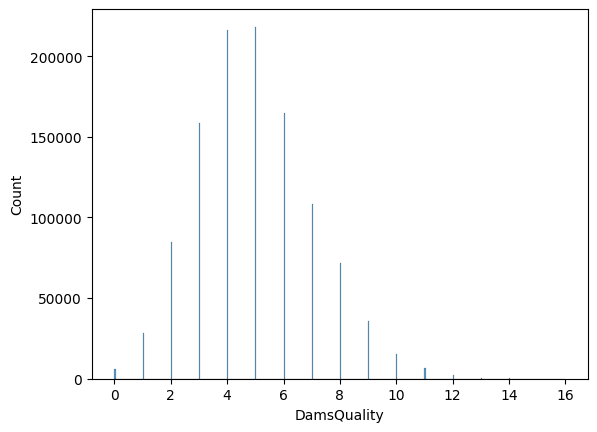

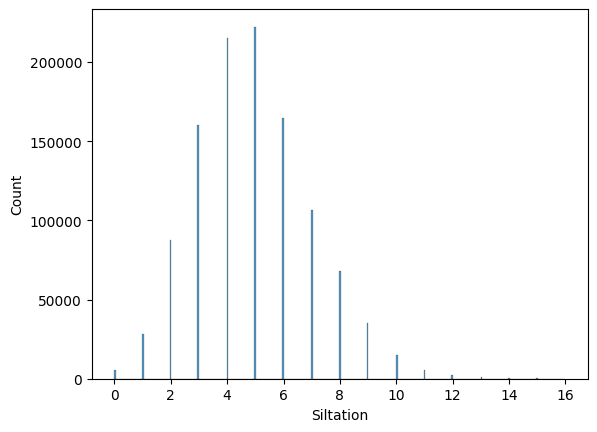

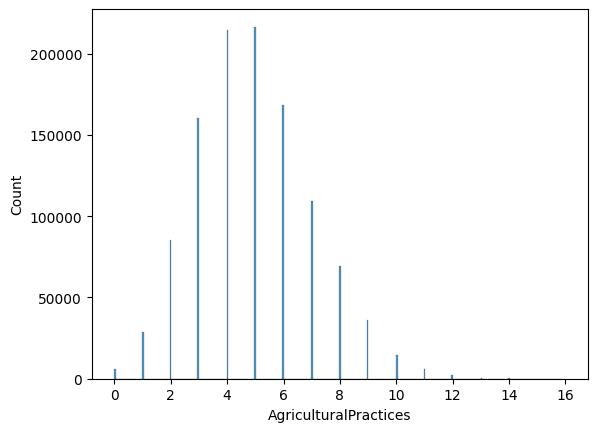

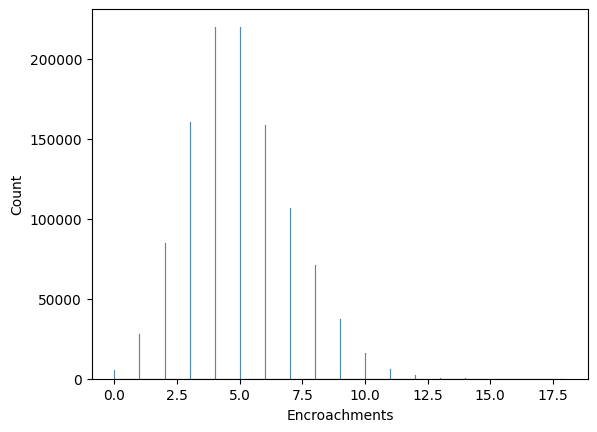

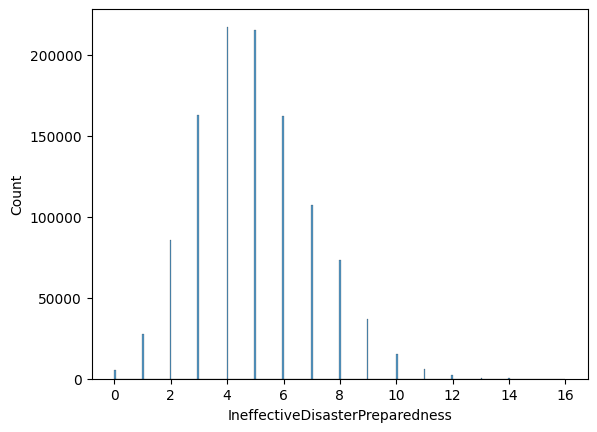

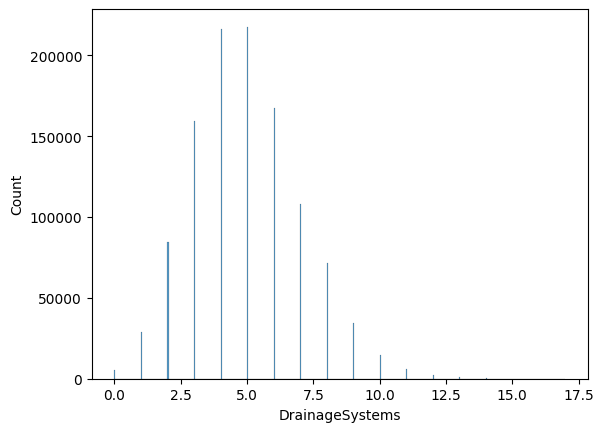

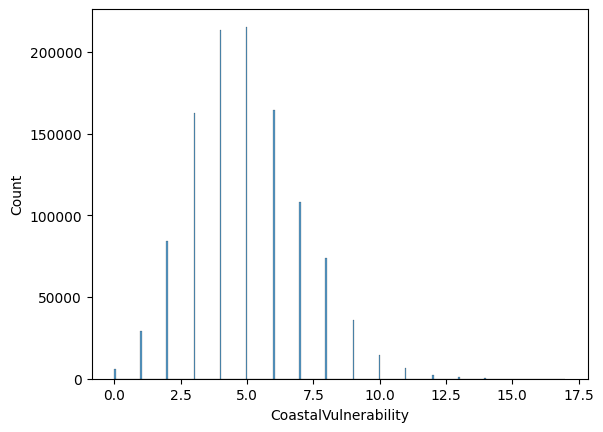

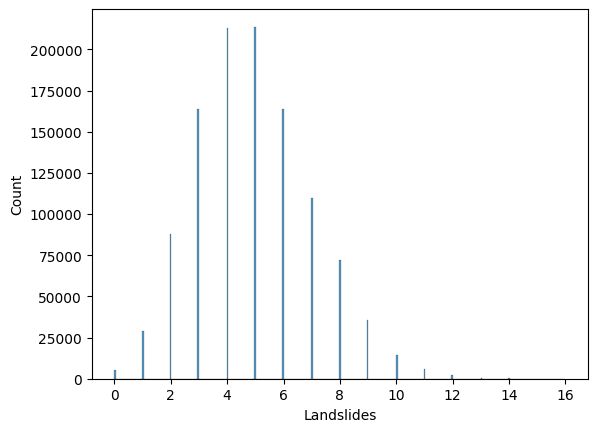

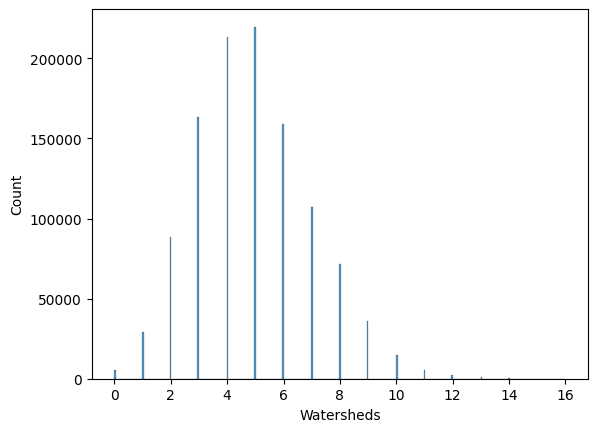

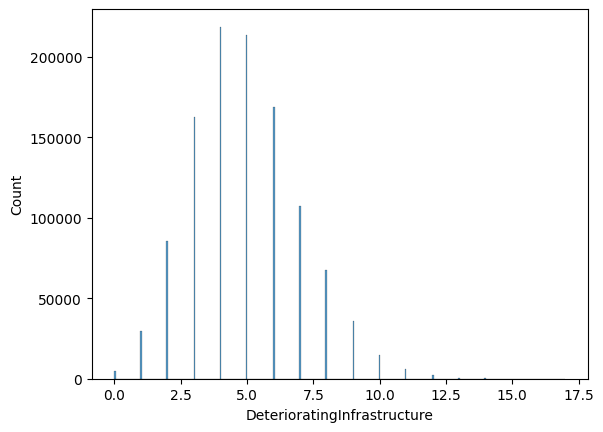

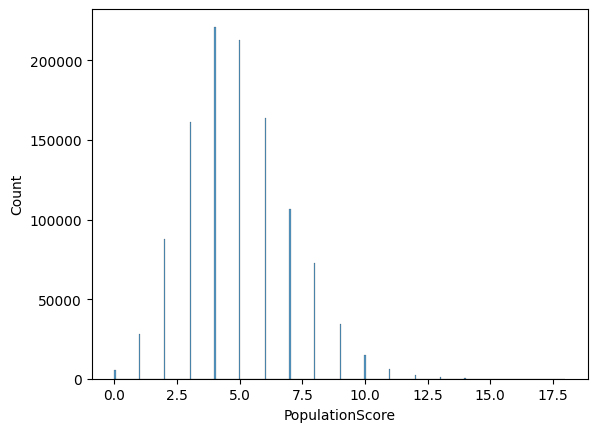

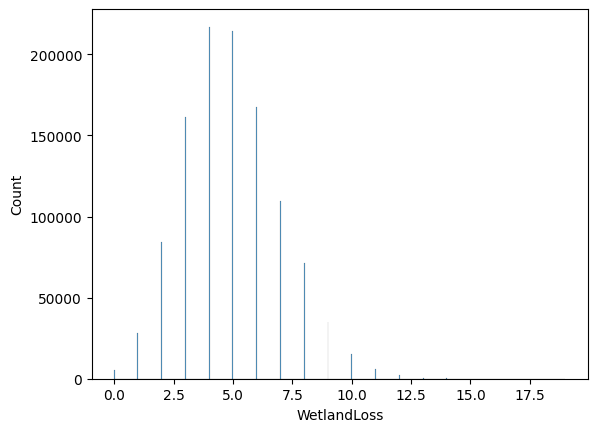

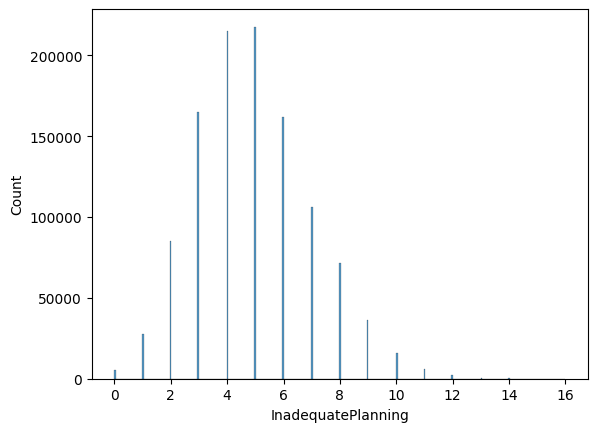

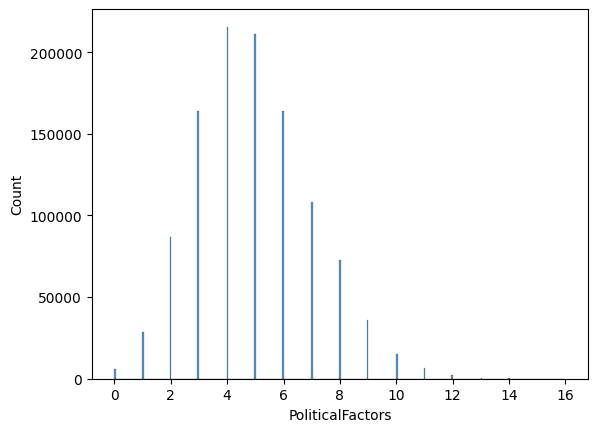

In [5]:
for n in df.keys()[1:-1]:
    sns.histplot(df[n])
    plt.show()

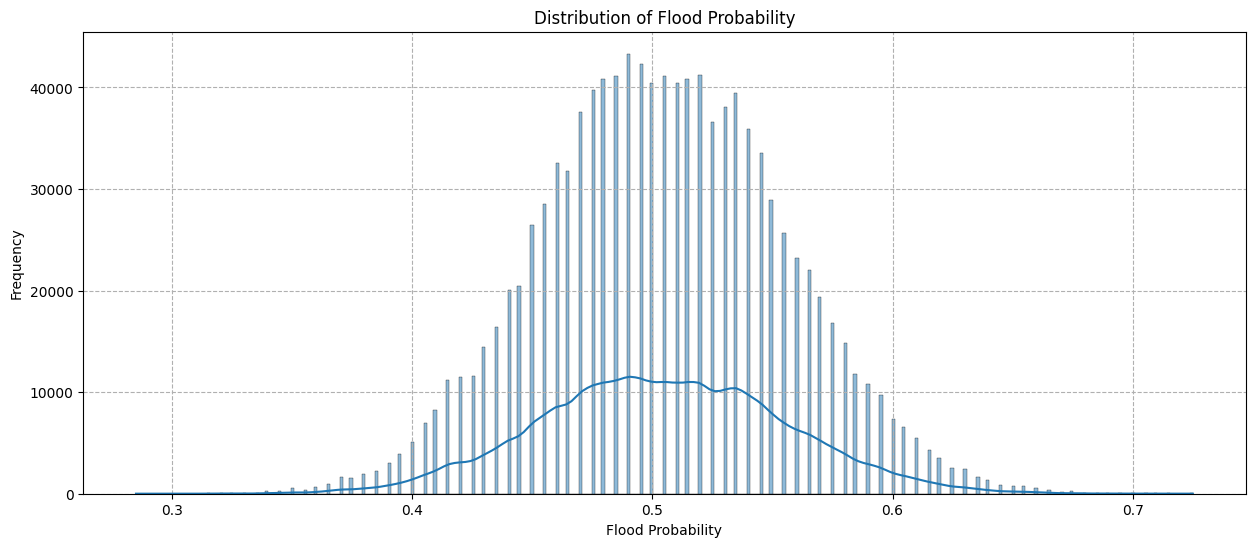

In [6]:
# Plot the distribution of the target variable
plt.figure(figsize=(15, 6))
sns.histplot(df['FloodProbability'], kde=True)
plt.title('Distribution of Flood Probability')
plt.xlabel('Flood Probability')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--')
plt.show()

### Features

In [7]:
features = df.keys()[1:-1]
features

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors'],
      dtype='object')

### Model Selection

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [9]:
X = df[features]
y = df['FloodProbability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 1. Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
print(f'R2 score of Linear Regression is {r2_lr}')

R2 score of Linear Regression is 0.8448773362840328


#### 2. XGBoost Regression

In [12]:
from xgboost import XGBRegressor

In [13]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)

y_pred_xgbr = xgbr.predict(X_test)

r2_xgbr = r2_score(y_test, y_pred_xgbr)
print(f'R2 score of XGBoost Regression is {r2_xgbr}')

R2 score of XGBoost Regression is 0.8090669608359393


#### 3. CatBoost Regression

In [14]:
from catboost import CatBoostRegressor

In [15]:
cbr = CatBoostRegressor()
cbr.fit(X_train, y_train)

y_pred_cbr = cbr.predict(X_test)

r2_cbr = r2_score(y_test, y_pred_cbr)
print(f'R2 score of CatBoost Regression is {r2_cbr}')

Learning rate set to 0.119817
0:	learn: 0.0501723	total: 204ms	remaining: 3m 23s
1:	learn: 0.0493197	total: 269ms	remaining: 2m 14s
2:	learn: 0.0484621	total: 332ms	remaining: 1m 50s
3:	learn: 0.0476957	total: 393ms	remaining: 1m 37s
4:	learn: 0.0469464	total: 470ms	remaining: 1m 33s
5:	learn: 0.0462136	total: 529ms	remaining: 1m 27s
6:	learn: 0.0455094	total: 590ms	remaining: 1m 23s
7:	learn: 0.0448639	total: 652ms	remaining: 1m 20s
8:	learn: 0.0442080	total: 714ms	remaining: 1m 18s
9:	learn: 0.0435677	total: 776ms	remaining: 1m 16s
10:	learn: 0.0429993	total: 830ms	remaining: 1m 14s
11:	learn: 0.0424384	total: 888ms	remaining: 1m 13s
12:	learn: 0.0418800	total: 944ms	remaining: 1m 11s
13:	learn: 0.0413436	total: 999ms	remaining: 1m 10s
14:	learn: 0.0408240	total: 1.05s	remaining: 1m 9s
15:	learn: 0.0402937	total: 1.11s	remaining: 1m 8s
16:	learn: 0.0397883	total: 1.16s	remaining: 1m 7s
17:	learn: 0.0393224	total: 1.22s	remaining: 1m 6s
18:	learn: 0.0388566	total: 1.27s	remaining: 1m 

#### 4. LightGBM Regression

In [16]:
from lightgbm import LGBMRegressor

In [17]:
lgbmr = LGBMRegressor()
lgbmr.fit(X_train, y_train)

y_pred_lgbmr = lgbmr.predict(X_test)

r2_lgbmr = r2_score(y_test, y_pred_lgbmr)
print(f'R2 score of lightGBM Regression is {r2_lgbmr}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 349
[LightGBM] [Info] Number of data points in the train set: 894365, number of used features: 20
[LightGBM] [Info] Start training from score 0.504480
R2 score of lightGBM Regression is 0.7656664606302841
